# Captstone Project Three: Crime in Maryland #

# I. Load Our Data #

In [1]:
#First, import packages needed for the project 

import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.close("all")

In [2]:
#load and read Crime file 
crime= pd.read_csv('/Users/devonbrewster/Downloads/Crime.csv')
print (crime)

/Users/devonbrewster/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


        Incident ID Offence Code  CR Number Dispatch Date / Time NIBRS Code  \
0         201282497         2204  200013249         3/19/20 8:32        220   
1         201282517         9199  200013277        3/19/20 13:24        90Z   
2         201298961         2303  200032445        8/19/20 18:30        23C   
3         201213005         2799  180055024        11/2/18 15:34        270   
4         201215423         3612  180057447                  NaN        90Z   
...             ...          ...        ...                  ...        ...   
231626    201311953         9099  200048106        12/6/20 17:19        90Z   
231627    201311995         2305  200048154         12/7/20 7:36        23F   
231628    201312254         9101  200048459         12/9/20 7:14        90Z   
231629    201312334         5404  200047724        12/3/20 21:50        90D   
231630    201312336         5404  200048038         12/6/20 1:39        90D   

        Victims             Crime Name1            

In [3]:
crime.info

<bound method DataFrame.info of         Incident ID Offence Code  CR Number Dispatch Date / Time NIBRS Code  \
0         201282497         2204  200013249         3/19/20 8:32        220   
1         201282517         9199  200013277        3/19/20 13:24        90Z   
2         201298961         2303  200032445        8/19/20 18:30        23C   
3         201213005         2799  180055024        11/2/18 15:34        270   
4         201215423         3612  180057447                  NaN        90Z   
...             ...          ...        ...                  ...        ...   
231626    201311953         9099  200048106        12/6/20 17:19        90Z   
231627    201311995         2305  200048154         12/7/20 7:36        23F   
231628    201312254         9101  200048459         12/9/20 7:14        90Z   
231629    201312334         5404  200047724        12/3/20 21:50        90D   
231630    201312336         5404  200048038         12/6/20 1:39        90D   

        Victims    

### We have 231631 crime incidents reported and 30 columns of different infomation about the crime###

In [4]:
crime.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201282497,2204,200013249,3/19/20 8:32,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,NaN,BROOKDALE,NaN,RD,3/18/20 21:00,3/19/20 5:00,38.955880,-77.094100,2D,"(38.9559, -77.0941)"
1,201282517,9199,200013277,3/19/20 13:24,90Z,1,Other,All Other Offenses,POLICE INFORMATION,GERMANTOWN,...,NaN,COLTRANE,NaN,DR,3/19/20 13:00,3/19/20 13:30,39.277402,-77.211546,5D,"(39.2774, -77.2115)"
2,201298961,2303,200032445,8/19/20 18:30,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,...,NaN,FREDERICK,NaN,RD,8/19/20 18:30,NaN,39.198295,-77.244900,5D,"(39.1983, -77.2449)"
3,201213005,2799,180055024,11/2/18 15:34,270,1,Crime Against Property,Embezzlement,EMBEZZLE (DESCRIBE OFFENSE),WHEATON,...,NaN,OLNEY SANDY SPRING,NaN,RD,11/2/18 15:34,NaN,39.148691,-77.032251,4D,"(39.1487, -77.0323)"
4,201215423,3612,180057447,NaN,90Z,1,Crime Against Society,All Other Offenses,SEX OFFENSE - FAILURE TO REGISTER AS A SEX OFF...,ROCKVILLE,...,NaN,EDISON PARK,NaN,DR,11/2/18 0:00,NaN,39.111781,-77.235281,1D,"(39.1118, -77.2353)"


In [5]:
crime.tail()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
231626,201311953,9099,200048106,12/6/20 17:19,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,BETHESDA,...,NaN,RUGBY,NaN,AVE,12/6/20 17:19,NaN,38.991328,-77.096733,2D,"(38.9913, -77.0967)"
231627,201311995,2305,200048154,12/7/20 7:36,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,...,NaN,ROBERT,NaN,CT,12/6/20 22:00,12/7/20 7:00,39.058954,-77.086007,4D,"(39.059, -77.086)"
231628,201312254,9101,200048459,12/9/20 7:14,90Z,1,Other,All Other Offenses,SUDDEN DEATH,ROCKVILLE,...,E,JEFFERSON,NaN,ST,12/9/20 7:14,NaN,39.057199,-77.126299,1D,"(39.0572, -77.1263)"
231629,201312334,5404,200047724,12/3/20 21:50,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,SILVER SPRING,...,NaN,16TH,NaN,ST,12/3/20 22:30,12/3/20 22:30,38.996520,-77.036478,3D,"(38.9965, -77.0365)"
231630,201312336,5404,200048038,12/6/20 1:39,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,MONTGOMERY VILLAGE,...,NaN,MIDCOUNTY,NaN,HWY,12/6/20 1:35,NaN,39.157885,-77.191998,6D,"(39.1579, -77.192)"


In [6]:
crime.dtypes

Incident ID                 int64
Offence Code               object
CR Number                   int64
Dispatch Date / Time       object
NIBRS Code                 object
Victims                     int64
Crime Name1                object
Crime Name2                object
Crime Name3                object
Police District Name       object
Block Address              object
City                       object
State                      object
Zip Code                  float64
Agency                     object
Place                      object
Sector                     object
Beat                       object
PRA                        object
Address Number            float64
Street Prefix              object
Street Name                object
Street Suffix              object
Street Type                object
Start_Date_Time            object
End_Date_Time              object
Latitude                  float64
Longitude                 float64
Police District Number     object
Location      

# II. Data Wrangling #

#### Lets display all of our columns to see what information we can receive about the crime entries reported####

In [7]:
pd.set_option('display.max_columns', None) #Lets see all the columns of the dataset 

In [8]:
crime

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201282497,2204,200013249,3/19/20 8:32,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,5000 BLK BROOKDALE RD,BETHESDA,MD,20816.0,MCPD,Residence - Garage,E,2.00E+01,4,5000.0,NaN,BROOKDALE,NaN,RD,3/18/20 21:00,3/19/20 5:00,38.955880,-77.094100,2D,"(38.9559, -77.0941)"
1,201282517,9199,200013277,3/19/20 13:24,90Z,1,Other,All Other Offenses,POLICE INFORMATION,GERMANTOWN,25600 BLK COLTRANE DR,DAMASCUS,MD,20872.0,MCPD,Residence -Townhouse/Duplex,M,5M2,615,25600.0,NaN,COLTRANE,NaN,DR,3/19/20 13:00,3/19/20 13:30,39.277402,-77.211546,5D,"(39.2774, -77.2115)"
2,201298961,2303,200032445,8/19/20 18:30,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,20900 BLK FREDERICK RD,GERMANTOWN,MD,20876.0,MCPD,Retail - Other,M,5M1,701,20900.0,NaN,FREDERICK,NaN,RD,8/19/20 18:30,NaN,39.198295,-77.244900,5D,"(39.1983, -77.2449)"
3,201213005,2799,180055024,11/2/18 15:34,270,1,Crime Against Property,Embezzlement,EMBEZZLE (DESCRIBE OFFENSE),WHEATON,1300 BLK OLNEY SANDY SPRING RD,SANDY SPRING,MD,20860.0,MCPD,Church/Synagogue/Temple,J,4J1,643,1300.0,NaN,OLNEY SANDY SPRING,NaN,RD,11/2/18 15:34,NaN,39.148691,-77.032251,4D,"(39.1487, -77.0323)"
4,201215423,3612,180057447,NaN,90Z,1,Crime Against Society,All Other Offenses,SEX OFFENSE - FAILURE TO REGISTER AS A SEX OFF...,ROCKVILLE,100 BLK EDISON PARK DR,GAITHERSBURG,MD,20878.0,MCPD,Government Building,B,1B2,725,100.0,NaN,EDISON PARK,NaN,DR,11/2/18 0:00,NaN,39.111781,-77.235281,1D,"(39.1118, -77.2353)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231626,201311953,9099,200048106,12/6/20 17:19,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,BETHESDA,4800 BLK RUGBY AVE,BETHESDA,MD,20814.0,MCPD,Street - Commercial,D,2D2,49,4800.0,NaN,RUGBY,NaN,AVE,12/6/20 17:19,NaN,38.991328,-77.096733,2D,"(38.9913, -77.0967)"
231627,201311995,2305,200048154,12/7/20 7:36,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,4300 BLK ROBERT CT,SILVER SPRING,MD,20906.0,MCPD,Street - Residential,K,4K2,525,4300.0,NaN,ROBERT,NaN,CT,12/6/20 22:00,12/7/20 7:00,39.058954,-77.086007,4D,"(39.059, -77.086)"
231628,201312254,9101,200048459,12/9/20 7:14,90Z,1,Other,All Other Offenses,SUDDEN DEATH,ROCKVILLE,1800 BLK E JEFFERSON ST,ROCKVILLE,MD,20852.0,RCPD,Residence - Apartment/Condo,A,1A1,268,1800.0,E,JEFFERSON,NaN,ST,12/9/20 7:14,NaN,39.057199,-77.126299,1D,"(39.0572, -77.1263)"
231629,201312334,5404,200047724,12/3/20 21:50,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,SILVER SPRING,NaN,SILVER SPRING,MD,20910.0,MCPD,Street - In vehicle,G,3G2,96,NaN,NaN,16TH,NaN,ST,12/3/20 22:30,12/3/20 22:30,38.996520,-77.036478,3D,"(38.9965, -77.0365)"


In [9]:
crime.columns

Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'NIBRS Code', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Police District Name', 'Block Address', 'City', 'State', 'Zip Code',
       'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address Number',
       'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type',
       'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location'],
      dtype='object')

In [10]:
#Drop a a few columns that will not help us to 
crime = crime.drop(columns = ['Longitude','Latitude','PRA','Street Prefix'])

#### Looking through the columns, we have three types of crime., Crime Name1, Crime Name2, Crime Name3. Lets take a count of each crime and how many incidents we have reported for each.####

In [11]:
crime['Crime Name1'].value_counts()
#Crime 1 reports which crime were either against property,society, person, not a crime, or other. 

Crime Against Property    101517
Crime Against Society      59252
Other                      46435
Crime Against Person       21494
Not a Crime                 2785
Name: Crime Name1, dtype: int64

In [12]:
crime['Crime Name2'].value_counts()

All Other Offenses                             53606
Drug/Narcotic Violations                       21065
Theft From Motor Vehicle                       20372
Simple Assault                                 15270
Destruction/Damage/Vandalism of Property       14098
Driving Under the Influence                    12294
Shoplifting                                    11890
All other Larceny                              10517
Theft from Building                             8626
Burglary/Breaking and Entering                  6738
Liquor Law Violations                           6272
Identity Theft                                  4625
False Pretenses/Swindle/Confidence Game         4467
Disorderly Conduct                              4459
Motor Vehicle Theft                             4271
Theft of Motor Vehicle Parts or Accessories     3900
Trespass of Real Property                       3355
Credit Card/Automatic Teller Machine Fraud      3256
Aggravated Assault                            

In [13]:
crime['Crime Name3'].value_counts()

LARCENY - FROM AUTO                                   20372
DRUGS - MARIJUANA - POSSESS                           14475
POLICE INFORMATION                                    13152
ASSAULT - 2ND DEGREE                                  12516
LARCENY - SHOPLIFTING                                 11890
                                                      ...  
WEAPON - SELLING                                          1
COMM SEX OFF - TRANSPORT FEMALE INTERSTATE FOR IMM        1
WEAPON TRAFFICKING                                        1
DAMAGE PROPERTY - PUBLIC-WITH EXPLOSIVE                   1
SMUGGLING - CONTRABAND                                    1
Name: Crime Name3, Length: 326, dtype: int64

In [14]:
crime['State'].value_counts()

MD    231437
16       169
DC        15
VA         3
MS         2
0          1
17         1
MC         1
ME         1
15         1
Name: State, dtype: int64

#### For the state listed we have MD,16,DC,VA,MS,17,ME,15,MC,and 0. We do not have have states in the United States called 16,0,15,and 17. We will drop these rows and when we dom all of our infomation will be focused on Maryland. Hence, our project will be focused on only Maryland crime reports.###

In [15]:
indexNames = crime[crime['State'] == 'DC'].index

# Delete these row indexes from dataFrame
crime.drop(indexNames , inplace=True)

In [16]:
crime['State'].value_counts()

MD    231437
16       169
VA         3
MS         2
0          1
17         1
MC         1
ME         1
15         1
Name: State, dtype: int64

In [17]:
indexNames = crime[crime['State'] == '16'].index
crime.drop(indexNames , inplace=True)

In [18]:
indexNames = crime[crime['State'] == 'VA'].index
crime.drop(indexNames , inplace=True)

In [19]:
indexNames = crime[crime['State'] == '0'].index
crime.drop(indexNames , inplace=True)

In [20]:
indexNames = crime[crime['State'] == '17'].index
crime.drop(indexNames , inplace=True)

In [21]:
indexNames = crime[crime['State'] == 'ME'].index
crime.drop(indexNames , inplace=True)

In [22]:
indexNames = crime[crime['State'] == 'MC'].index
crime.drop(indexNames , inplace=True)

In [23]:
indexNames = crime[crime['State'] == 'MS'].index
crime.drop(indexNames , inplace=True)

In [24]:
indexNames = crime[crime['State'] == '15'].index
crime.drop(indexNames , inplace=True)

In [25]:
crime['State'].value_counts()

MD    231437
Name: State, dtype: int64

In [26]:
crime

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,Address Number,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Police District Number,Location
0,201282497,2204,200013249,3/19/20 8:32,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,5000 BLK BROOKDALE RD,BETHESDA,MD,20816.0,MCPD,Residence - Garage,E,2.00E+01,5000.0,BROOKDALE,NaN,RD,3/18/20 21:00,3/19/20 5:00,2D,"(38.9559, -77.0941)"
1,201282517,9199,200013277,3/19/20 13:24,90Z,1,Other,All Other Offenses,POLICE INFORMATION,GERMANTOWN,25600 BLK COLTRANE DR,DAMASCUS,MD,20872.0,MCPD,Residence -Townhouse/Duplex,M,5M2,25600.0,COLTRANE,NaN,DR,3/19/20 13:00,3/19/20 13:30,5D,"(39.2774, -77.2115)"
2,201298961,2303,200032445,8/19/20 18:30,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,20900 BLK FREDERICK RD,GERMANTOWN,MD,20876.0,MCPD,Retail - Other,M,5M1,20900.0,FREDERICK,NaN,RD,8/19/20 18:30,NaN,5D,"(39.1983, -77.2449)"
3,201213005,2799,180055024,11/2/18 15:34,270,1,Crime Against Property,Embezzlement,EMBEZZLE (DESCRIBE OFFENSE),WHEATON,1300 BLK OLNEY SANDY SPRING RD,SANDY SPRING,MD,20860.0,MCPD,Church/Synagogue/Temple,J,4J1,1300.0,OLNEY SANDY SPRING,NaN,RD,11/2/18 15:34,NaN,4D,"(39.1487, -77.0323)"
4,201215423,3612,180057447,NaN,90Z,1,Crime Against Society,All Other Offenses,SEX OFFENSE - FAILURE TO REGISTER AS A SEX OFF...,ROCKVILLE,100 BLK EDISON PARK DR,GAITHERSBURG,MD,20878.0,MCPD,Government Building,B,1B2,100.0,EDISON PARK,NaN,DR,11/2/18 0:00,NaN,1D,"(39.1118, -77.2353)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231626,201311953,9099,200048106,12/6/20 17:19,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,BETHESDA,4800 BLK RUGBY AVE,BETHESDA,MD,20814.0,MCPD,Street - Commercial,D,2D2,4800.0,RUGBY,NaN,AVE,12/6/20 17:19,NaN,2D,"(38.9913, -77.0967)"
231627,201311995,2305,200048154,12/7/20 7:36,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,4300 BLK ROBERT CT,SILVER SPRING,MD,20906.0,MCPD,Street - Residential,K,4K2,4300.0,ROBERT,NaN,CT,12/6/20 22:00,12/7/20 7:00,4D,"(39.059, -77.086)"
231628,201312254,9101,200048459,12/9/20 7:14,90Z,1,Other,All Other Offenses,SUDDEN DEATH,ROCKVILLE,1800 BLK E JEFFERSON ST,ROCKVILLE,MD,20852.0,RCPD,Residence - Apartment/Condo,A,1A1,1800.0,JEFFERSON,NaN,ST,12/9/20 7:14,NaN,1D,"(39.0572, -77.1263)"
231629,201312334,5404,200047724,12/3/20 21:50,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,SILVER SPRING,NaN,SILVER SPRING,MD,20910.0,MCPD,Street - In vehicle,G,3G2,NaN,16TH,NaN,ST,12/3/20 22:30,12/3/20 22:30,3D,"(38.9965, -77.0365)"


In [27]:
crime.isnull().sum().sort_values(ascending = True)

Incident ID                    0
Start_Date_Time                0
Street Name                    0
Place                          0
Agency                         0
Police District Number         0
Police District Name           0
State                          0
Location                       0
Offence Code                   0
CR Number                      0
Victims                        0
NIBRS Code                     0
Beat                          53
Sector                        53
Crime Name2                  148
Crime Name1                  148
Crime Name3                  148
Street Type                  316
City                        1079
Zip Code                    3177
Address Number             20795
Block Address              20870
Dispatch Date / Time       47875
End_Date_Time             119581
Street Suffix             227123
dtype: int64

In [28]:
crime.drop(columns = ['Street Suffix'])

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,Address Number,Street Name,Street Type,Start_Date_Time,End_Date_Time,Police District Number,Location
0,201282497,2204,200013249,3/19/20 8:32,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,5000 BLK BROOKDALE RD,BETHESDA,MD,20816.0,MCPD,Residence - Garage,E,2.00E+01,5000.0,BROOKDALE,RD,3/18/20 21:00,3/19/20 5:00,2D,"(38.9559, -77.0941)"
1,201282517,9199,200013277,3/19/20 13:24,90Z,1,Other,All Other Offenses,POLICE INFORMATION,GERMANTOWN,25600 BLK COLTRANE DR,DAMASCUS,MD,20872.0,MCPD,Residence -Townhouse/Duplex,M,5M2,25600.0,COLTRANE,DR,3/19/20 13:00,3/19/20 13:30,5D,"(39.2774, -77.2115)"
2,201298961,2303,200032445,8/19/20 18:30,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,20900 BLK FREDERICK RD,GERMANTOWN,MD,20876.0,MCPD,Retail - Other,M,5M1,20900.0,FREDERICK,RD,8/19/20 18:30,NaN,5D,"(39.1983, -77.2449)"
3,201213005,2799,180055024,11/2/18 15:34,270,1,Crime Against Property,Embezzlement,EMBEZZLE (DESCRIBE OFFENSE),WHEATON,1300 BLK OLNEY SANDY SPRING RD,SANDY SPRING,MD,20860.0,MCPD,Church/Synagogue/Temple,J,4J1,1300.0,OLNEY SANDY SPRING,RD,11/2/18 15:34,NaN,4D,"(39.1487, -77.0323)"
4,201215423,3612,180057447,NaN,90Z,1,Crime Against Society,All Other Offenses,SEX OFFENSE - FAILURE TO REGISTER AS A SEX OFF...,ROCKVILLE,100 BLK EDISON PARK DR,GAITHERSBURG,MD,20878.0,MCPD,Government Building,B,1B2,100.0,EDISON PARK,DR,11/2/18 0:00,NaN,1D,"(39.1118, -77.2353)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231626,201311953,9099,200048106,12/6/20 17:19,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,BETHESDA,4800 BLK RUGBY AVE,BETHESDA,MD,20814.0,MCPD,Street - Commercial,D,2D2,4800.0,RUGBY,AVE,12/6/20 17:19,NaN,2D,"(38.9913, -77.0967)"
231627,201311995,2305,200048154,12/7/20 7:36,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,4300 BLK ROBERT CT,SILVER SPRING,MD,20906.0,MCPD,Street - Residential,K,4K2,4300.0,ROBERT,CT,12/6/20 22:00,12/7/20 7:00,4D,"(39.059, -77.086)"
231628,201312254,9101,200048459,12/9/20 7:14,90Z,1,Other,All Other Offenses,SUDDEN DEATH,ROCKVILLE,1800 BLK E JEFFERSON ST,ROCKVILLE,MD,20852.0,RCPD,Residence - Apartment/Condo,A,1A1,1800.0,JEFFERSON,ST,12/9/20 7:14,NaN,1D,"(39.0572, -77.1263)"
231629,201312334,5404,200047724,12/3/20 21:50,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,SILVER SPRING,NaN,SILVER SPRING,MD,20910.0,MCPD,Street - In vehicle,G,3G2,NaN,16TH,ST,12/3/20 22:30,12/3/20 22:30,3D,"(38.9965, -77.0365)"


In [29]:
#Some of out data is in our end time column, start time columns, and others so lets drop these columns.
crime = crime.replace(np.nan, '', regex=True)

In [30]:
crime

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,Address Number,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Police District Number,Location
0,201282497,2204,200013249,3/19/20 8:32,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,5000 BLK BROOKDALE RD,BETHESDA,MD,20816,MCPD,Residence - Garage,E,2.00E+01,5000,BROOKDALE,,RD,3/18/20 21:00,3/19/20 5:00,2D,"(38.9559, -77.0941)"
1,201282517,9199,200013277,3/19/20 13:24,90Z,1,Other,All Other Offenses,POLICE INFORMATION,GERMANTOWN,25600 BLK COLTRANE DR,DAMASCUS,MD,20872,MCPD,Residence -Townhouse/Duplex,M,5M2,25600,COLTRANE,,DR,3/19/20 13:00,3/19/20 13:30,5D,"(39.2774, -77.2115)"
2,201298961,2303,200032445,8/19/20 18:30,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,20900 BLK FREDERICK RD,GERMANTOWN,MD,20876,MCPD,Retail - Other,M,5M1,20900,FREDERICK,,RD,8/19/20 18:30,,5D,"(39.1983, -77.2449)"
3,201213005,2799,180055024,11/2/18 15:34,270,1,Crime Against Property,Embezzlement,EMBEZZLE (DESCRIBE OFFENSE),WHEATON,1300 BLK OLNEY SANDY SPRING RD,SANDY SPRING,MD,20860,MCPD,Church/Synagogue/Temple,J,4J1,1300,OLNEY SANDY SPRING,,RD,11/2/18 15:34,,4D,"(39.1487, -77.0323)"
4,201215423,3612,180057447,,90Z,1,Crime Against Society,All Other Offenses,SEX OFFENSE - FAILURE TO REGISTER AS A SEX OFF...,ROCKVILLE,100 BLK EDISON PARK DR,GAITHERSBURG,MD,20878,MCPD,Government Building,B,1B2,100,EDISON PARK,,DR,11/2/18 0:00,,1D,"(39.1118, -77.2353)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231626,201311953,9099,200048106,12/6/20 17:19,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,BETHESDA,4800 BLK RUGBY AVE,BETHESDA,MD,20814,MCPD,Street - Commercial,D,2D2,4800,RUGBY,,AVE,12/6/20 17:19,,2D,"(38.9913, -77.0967)"
231627,201311995,2305,200048154,12/7/20 7:36,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,4300 BLK ROBERT CT,SILVER SPRING,MD,20906,MCPD,Street - Residential,K,4K2,4300,ROBERT,,CT,12/6/20 22:00,12/7/20 7:00,4D,"(39.059, -77.086)"
231628,201312254,9101,200048459,12/9/20 7:14,90Z,1,Other,All Other Offenses,SUDDEN DEATH,ROCKVILLE,1800 BLK E JEFFERSON ST,ROCKVILLE,MD,20852,RCPD,Residence - Apartment/Condo,A,1A1,1800,JEFFERSON,,ST,12/9/20 7:14,,1D,"(39.0572, -77.1263)"
231629,201312334,5404,200047724,12/3/20 21:50,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,SILVER SPRING,,SILVER SPRING,MD,20910,MCPD,Street - In vehicle,G,3G2,,16TH,,ST,12/3/20 22:30,12/3/20 22:30,3D,"(38.9965, -77.0365)"


In [31]:
crime.isnull().sum().sort_values(ascending = True)

Incident ID               0
End_Date_Time             0
Start_Date_Time           0
Street Type               0
Street Suffix             0
Street Name               0
Address Number            0
Beat                      0
Sector                    0
Place                     0
Agency                    0
Zip Code                  0
State                     0
City                      0
Block Address             0
Police District Name      0
Crime Name3               0
Crime Name2               0
Crime Name1               0
Victims                   0
NIBRS Code                0
Dispatch Date / Time      0
CR Number                 0
Offence Code              0
Police District Number    0
Location                  0
dtype: int64

In [32]:
crime

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,Address Number,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Police District Number,Location
0,201282497,2204,200013249,3/19/20 8:32,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,5000 BLK BROOKDALE RD,BETHESDA,MD,20816,MCPD,Residence - Garage,E,2.00E+01,5000,BROOKDALE,,RD,3/18/20 21:00,3/19/20 5:00,2D,"(38.9559, -77.0941)"
1,201282517,9199,200013277,3/19/20 13:24,90Z,1,Other,All Other Offenses,POLICE INFORMATION,GERMANTOWN,25600 BLK COLTRANE DR,DAMASCUS,MD,20872,MCPD,Residence -Townhouse/Duplex,M,5M2,25600,COLTRANE,,DR,3/19/20 13:00,3/19/20 13:30,5D,"(39.2774, -77.2115)"
2,201298961,2303,200032445,8/19/20 18:30,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,20900 BLK FREDERICK RD,GERMANTOWN,MD,20876,MCPD,Retail - Other,M,5M1,20900,FREDERICK,,RD,8/19/20 18:30,,5D,"(39.1983, -77.2449)"
3,201213005,2799,180055024,11/2/18 15:34,270,1,Crime Against Property,Embezzlement,EMBEZZLE (DESCRIBE OFFENSE),WHEATON,1300 BLK OLNEY SANDY SPRING RD,SANDY SPRING,MD,20860,MCPD,Church/Synagogue/Temple,J,4J1,1300,OLNEY SANDY SPRING,,RD,11/2/18 15:34,,4D,"(39.1487, -77.0323)"
4,201215423,3612,180057447,,90Z,1,Crime Against Society,All Other Offenses,SEX OFFENSE - FAILURE TO REGISTER AS A SEX OFF...,ROCKVILLE,100 BLK EDISON PARK DR,GAITHERSBURG,MD,20878,MCPD,Government Building,B,1B2,100,EDISON PARK,,DR,11/2/18 0:00,,1D,"(39.1118, -77.2353)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231626,201311953,9099,200048106,12/6/20 17:19,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,BETHESDA,4800 BLK RUGBY AVE,BETHESDA,MD,20814,MCPD,Street - Commercial,D,2D2,4800,RUGBY,,AVE,12/6/20 17:19,,2D,"(38.9913, -77.0967)"
231627,201311995,2305,200048154,12/7/20 7:36,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,4300 BLK ROBERT CT,SILVER SPRING,MD,20906,MCPD,Street - Residential,K,4K2,4300,ROBERT,,CT,12/6/20 22:00,12/7/20 7:00,4D,"(39.059, -77.086)"
231628,201312254,9101,200048459,12/9/20 7:14,90Z,1,Other,All Other Offenses,SUDDEN DEATH,ROCKVILLE,1800 BLK E JEFFERSON ST,ROCKVILLE,MD,20852,RCPD,Residence - Apartment/Condo,A,1A1,1800,JEFFERSON,,ST,12/9/20 7:14,,1D,"(39.0572, -77.1263)"
231629,201312334,5404,200047724,12/3/20 21:50,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,SILVER SPRING,,SILVER SPRING,MD,20910,MCPD,Street - In vehicle,G,3G2,,16TH,,ST,12/3/20 22:30,12/3/20 22:30,3D,"(38.9965, -77.0365)"


# III. Exploratory Data Analysis ### 

In [33]:
#a single index
table = pd.pivot_table(data=crime,index=['State','Crime Name2'])
table

CR Number   Incident ID  \
State Crime Name2                                                               
MD                                                 1.938554e+08  2.012637e+08   
      Aggravated Assault                           1.568750e+08  2.012056e+08   
      All Other Offenses                           1.578085e+08  2.012036e+08   
      All other Larceny                            1.547132e+08  2.012023e+08   
      Arson                                        1.576638e+08  2.011982e+08   
      Assisting or Promoting Prostitution          1.098922e+08  2.011541e+08   
      Bad Checks                                   1.543939e+08  2.011957e+08   
      Burglary/Breaking and Entering               1.503614e+08  2.011979e+08   
      Counterfeiting/Forgery                       1.599424e+08  2.012066e+08   
      Credit Card/Automatic Teller Machine Fraud   1.579093e+08  2.012068e+08   
      Curfew/Loitering/Vagrancy Violations         1.428513e+08  2.011718e+08   
      Destruction/Damage/Vandalism of Property     1.541232e+08  2.012011e+08   
      Disorderly Conduct                           1.450301e+08  2.011855e+08   
      Driving Under the Influence                  1.465861e+08  2.011912e+08   
      Drug Equipment Violations                    1.432392e+08  2.011837e+08   
      Drug/Narcotic Violations                     1.510306e+08  2.011882e+08   
      Drunkenness                                  1.470463e+08  2.011810e+08   
      Embezzlement                                 1.620600e+08  2.012089e+08   
      Extortion/Blackmail                          1.625740e+08  2.012212e+08   
      False Pretenses/Swindle/Confidence Game      1.610793e+08  2.012131e+08   
      Family Offenses, NonViolent                  1.577023e+08  2.012028e+08   
      Fondling                                     1.541983e+08  2.011991e+08   
      Forcible Fondling                            1.594857e+08  2.012084e+08   
      Forcible Rape                                1.656416e+08  2.012124e+08   
      Forcible Sodomy                              1.784526e+08  2.012257e+08   
      From Coin/Operated Machine or Device         1.646339e+08  2.012096e+08   
      Human Trafficking, Commercial Sex Acts       1.711439e+08  2.011993e+08   
      Identity Theft                               1.870374e+08  2.012330e+08   
      Impersonation                                8.154662e+07  2.011292e+08   
      Intimidation                                 1.607504e+08  2.011891e+08   
      Justifiable Homicide                         1.628527e+08  2.012544e+08   
      Kidnapping/Abduction                         1.634011e+08  2.011959e+08   
      Liquor Law Violations                        1.498583e+08  2.011864e+08   
      Motor Vehicle Theft                          1.568719e+08  2.012087e+08   
      Murder and Nonnegligent Manslaughter         1.609482e+08  2.012087e+08   
      NOT NIBRS CODE                               1.532780e+08  2.011900e+08   
      Negligent Manslaughter                       1.705298e+08  2.011904e+08   
      Not Mapped                                   1.628631e+08  2.011971e+08   
      Operating/Promoting/Assisting Gambling       1.800272e+08  2.011907e+08   
      Peeping Tom                                  1.683342e+08  2.012081e+08   
      Pocket/picking                               1.506880e+08  2.011958e+08   
      Pornography/Obscene Material                 1.725170e+08  2.012249e+08   
      Prostitution                                 1.366410e+08  2.011773e+08   
      Purse-snatching                              1.601254e+08  2.012051e+08   
      Robbery                                      1.499792e+08  2.011945e+08   
      Runaway                                      1.530231e+08  2.011991e+08   
      Sexual Assault With An Object                1.781312e+08  2.012251e+08   
      Shoplifting                                  1.595214e+08  2.012055e+08   
    

In [34]:
table = pd.pivot_table(data=crime,index=['State','Crime Name2'])
table

CR Number   Incident ID  \
State Crime Name2                                                               
MD                                                 1.938554e+08  2.012637e+08   
      Aggravated Assault                           1.568750e+08  2.012056e+08   
      All Other Offenses                           1.578085e+08  2.012036e+08   
      All other Larceny                            1.547132e+08  2.012023e+08   
      Arson                                        1.576638e+08  2.011982e+08   
      Assisting or Promoting Prostitution          1.098922e+08  2.011541e+08   
      Bad Checks                                   1.543939e+08  2.011957e+08   
      Burglary/Breaking and Entering               1.503614e+08  2.011979e+08   
      Counterfeiting/Forgery                       1.599424e+08  2.012066e+08   
      Credit Card/Automatic Teller Machine Fraud   1.579093e+08  2.012068e+08   
      Curfew/Loitering/Vagrancy Violations         1.428513e+08  2.011718e+08   
      Destruction/Damage/Vandalism of Property     1.541232e+08  2.012011e+08   
      Disorderly Conduct                           1.450301e+08  2.011855e+08   
      Driving Under the Influence                  1.465861e+08  2.011912e+08   
      Drug Equipment Violations                    1.432392e+08  2.011837e+08   
      Drug/Narcotic Violations                     1.510306e+08  2.011882e+08   
      Drunkenness                                  1.470463e+08  2.011810e+08   
      Embezzlement                                 1.620600e+08  2.012089e+08   
      Extortion/Blackmail                          1.625740e+08  2.012212e+08   
      False Pretenses/Swindle/Confidence Game      1.610793e+08  2.012131e+08   
      Family Offenses, NonViolent                  1.577023e+08  2.012028e+08   
      Fondling                                     1.541983e+08  2.011991e+08   
      Forcible Fondling                            1.594857e+08  2.012084e+08   
      Forcible Rape                                1.656416e+08  2.012124e+08   
      Forcible Sodomy                              1.784526e+08  2.012257e+08   
      From Coin/Operated Machine or Device         1.646339e+08  2.012096e+08   
      Human Trafficking, Commercial Sex Acts       1.711439e+08  2.011993e+08   
      Identity Theft                               1.870374e+08  2.012330e+08   
      Impersonation                                8.154662e+07  2.011292e+08   
      Intimidation                                 1.607504e+08  2.011891e+08   
      Justifiable Homicide                         1.628527e+08  2.012544e+08   
      Kidnapping/Abduction                         1.634011e+08  2.011959e+08   
      Liquor Law Violations                        1.498583e+08  2.011864e+08   
      Motor Vehicle Theft                          1.568719e+08  2.012087e+08   
      Murder and Nonnegligent Manslaughter         1.609482e+08  2.012087e+08   
      NOT NIBRS CODE                               1.532780e+08  2.011900e+08   
      Negligent Manslaughter                       1.705298e+08  2.011904e+08   
      Not Mapped                                   1.628631e+08  2.011971e+08   
      Operating/Promoting/Assisting Gambling       1.800272e+08  2.011907e+08   
      Peeping Tom                                  1.683342e+08  2.012081e+08   
      Pocket/picking                               1.506880e+08  2.011958e+08   
      Pornography/Obscene Material                 1.725170e+08  2.012249e+08   
      Prostitution                                 1.366410e+08  2.011773e+08   
      Purse-snatching                              1.601254e+08  2.012051e+08   
      Robbery                                      1.499792e+08  2.011945e+08   
      Runaway                                      1.530231e+08  2.011991e+08   
      Sexual Assault With An Object                1.781312e+08  2.012251e+08   
      Shoplifting                                  1.595214e+08  2.012055e+08   
    

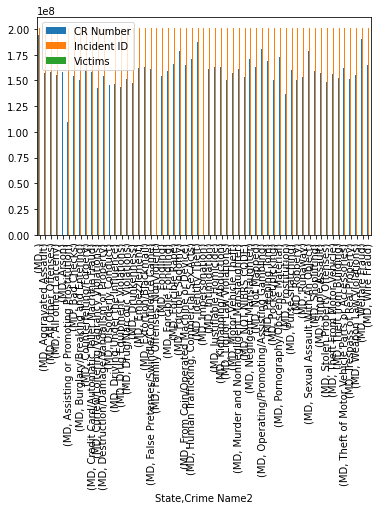

In [35]:
table.plot(kind='bar');

In [36]:
pd.pivot_table(crime,index=["Crime Name2","Police District Name"],values=["Victims"])
pd.set_option('display.max_columns', None) #Lets see all the columns of the dataset 
pd.set_option('display.max_rows', None) #Lets see all the columns of the dataset 

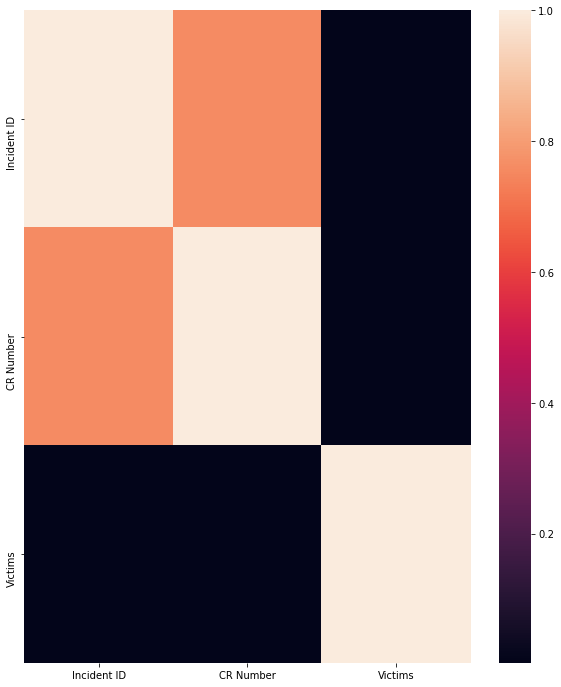

In [37]:
plt.subplots(figsize=(10,12))
sns.heatmap(crime.corr());

# Step 3: PrePorcessing and Modeling

In [38]:
#Lets take a subset of the dataframe since our dataframe is large
smallcrime = crime.iloc[2:25, [5,6,12,13,18]]

In [ ]:
plt.plot(Crime Name1,yAxis)
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()

In [ ]:
smallcrime

In [ ]:
smallcrime.columns = smallcrime.columns.str.replace(' ', '')

In [ ]:
smallcrime.CrimeName1[smallcrime.CrimeName1 == 'Crime Against Property'] = 1
smallcrime.CrimeName1[smallcrime.CrimeName1 == 'Crime Against Society'] = 2
smallcrime.CrimeName1[smallcrime.CrimeName1 == 'Crime Against Person'] = 3
smallcrime.CrimeName1[smallcrime.CrimeName1 == 'Other'] = 4

In [ ]:
smallcrime.State[smallcrime.State == 'MD'] = 5

In [ ]:
smallcrime.replace('', value=0, inplace=True)

In [ ]:
X = smallcrime.drop(columns = 'CrimeName1')
Y= smallcrime['CrimeName1']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

In [ ]:
X

In [ ]:
Y

In [ ]:
regressor = RandomForestRegressor(n_estimators = 15)
#making 15 trees 

In [ ]:
regressor.fit(X_train,Y_train)
predictions = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

In [ ]:
regressor = RandomForestRegressor(n_estimators = 50)

In [ ]:
regressor.fit(X_train,Y_train)
predictions = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))